In [3]:
from datetime import datetime
import statistics 

def random_faces(G):
    """
        G is a simple graph with no loop. 
        We create a set of halfedges, indexed by 1, ..., N = 2*G.num_edges().
        Then we generate the permutationo alpha and random sigma.
        And we return phi. 
        Then we can ask for 
         phi.cycle_type()
         or
         phi.cycle_tuples()
    """

    E1 = G.edges(labels=None)
    E2 = [(y,x) for (x,y) in E1]
    H = [None] + E1 + E2
    N = len(H)-1


    alpha=Permutation([(i,i+len(E1)) for i in range(1,len(E1)+1)])

    sigma = Permutation(
      [tuple(Permutations([H.index((v,x)) for x in G.neighbor_iterator(v)]).random_element())
      for v in G.vertices()])

    phi=alpha*sigma
    return phi

def sample_number_of_faces(G,samples=10):
    return [len(random_faces(G).cycle_type()) for _ in range(samples)]

    

def exp_size(L):
    return sum(L)/len(L)

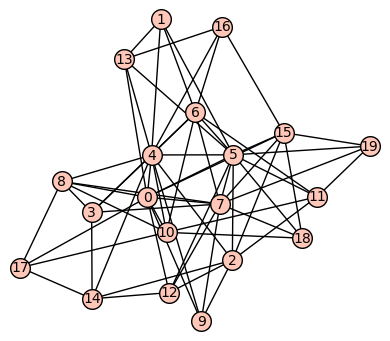

In [4]:
graphs.RandomBarabasiAlbert(20,4).show()

In [5]:
sizes = [3,6,12]
Grid = {}
List = {}
for s in sizes:
    Grid[s] = graphs.PathGraph(s).cartesian_product(graphs.PathGraph(s))
    
P10 = graphs.PathGraph(10)
P20 = graphs.PathGraph(20)


Pt = graphs.PetersenGraph()

Grid10 = P10.cartesian_product(P10)
Grid20 = P20.cartesian_product(P20)

In [6]:
Grid

{3: Graph on 9 vertices, 6: Graph on 36 vertices, 12: Graph on 144 vertices}

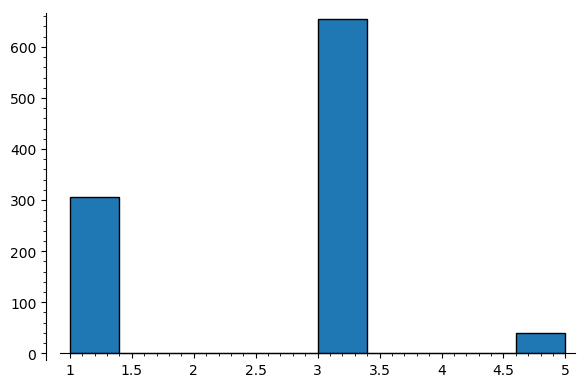

2.464

In [8]:
L_Pt = sample_number_of_faces(Pt, samples=1000)

histogram(L_Pt).show()
exp_size(L_Pt)


In [6]:
uniq(L_Pt)

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: the output of uniq(X) being sorted is deprecated; use sorted(set(X)) instead if you want sorted output
See https://trac.sagemath.org/27014 for details.
  from ipykernel.kernelapp import IPKernelApp


[1, 3, 5]

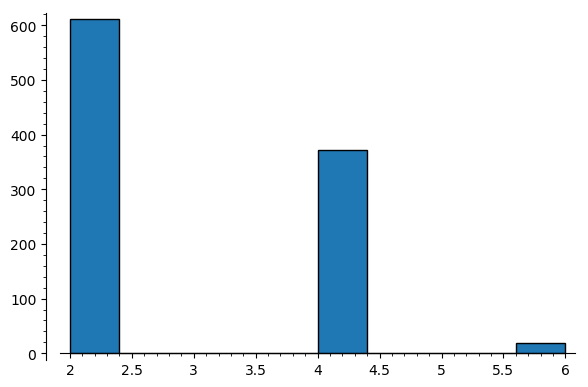

2.814

In [7]:
Fl = graphs.FlowerSnark()
L_Fl = sample_number_of_faces(Fl, samples=1000)

histogram(L_Fl).show()
exp_size(L_Fl)

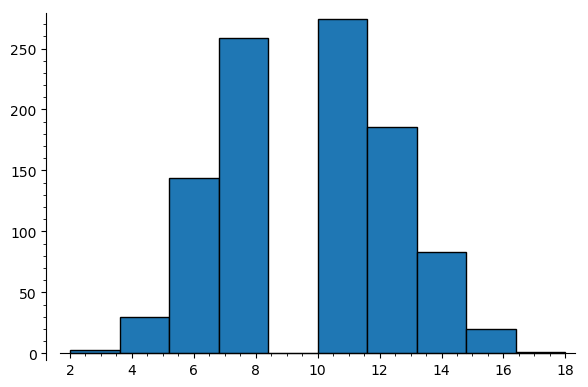

9.534
CPU times: user 2min 34s, sys: 203 ms, total: 2min 34s
Wall time: 2min 43s


In [8]:
%%time
L10 = sample_number_of_faces(Grid10, samples=1000)

histogram(L10).show()
print(exp_size(L10))

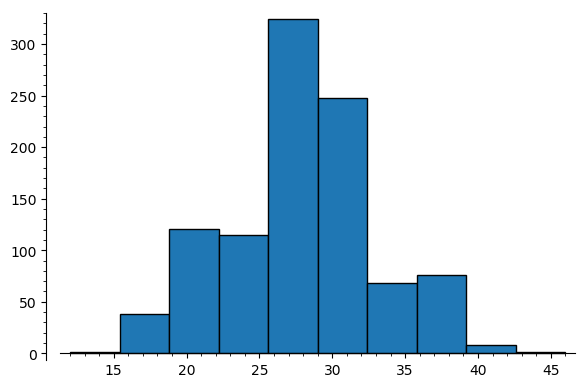

27.916
CPU times: user 42min 22s, sys: 5.5 s, total: 42min 28s
Wall time: 45min 29s


In [9]:
%%time
L20 = sample_number_of_faces(Grid20, samples=1000)

histogram(L20).show()
print(exp_size(L20))

In [10]:
%%time
s=3
L[s] = sample_number_of_faces(Grid[s], samples=1000)

histogram(L[s]).show()
print(exp_size(L[s]))

NameError: name 'L' is not defined

In [ ]:
%%time
s=6
L[s] = sample_number_of_faces(Grid[s], samples=100)

histogram(L[s]).show()
print(exp_size(L[s]))

In [ ]:
%%time
s=12
L[s] = sample_number_of_faces(Grid[s], samples=100)

histogram(L[s]).show()
print(exp_size(L[s]))

In [ ]:
print([3*2^k for k in range(10)])

In [ ]:
from datetime import datetime

datetime.today().strftime('%Y-%m-%d-%H-%M-%S')

In [ ]:
nf = load("list.sobj")
nf_sizes = nf.keys()
enf = {}
print(nf_sizes)

for s in nf_sizes:
    enf[s] = exp_size(nf[s])

#list_plot([log(enf[s])/log(s) for s in nf_sizes])

list_plot([enf[s]/(s^2/20) for s in nf_sizes])+plot(1,0,len(nf_sizes),color="red")

#list_plot([enf[s]/(s*log(s)^2/5) for s in nf_sizes])+plot(1,0,len(nf_sizes),color="red")

In [ ]:
snf = load("short_list.sobj")
snf_sizes = snf.keys()
esnf = {}

for s in snf_sizes:
    esnf[s] = exp_size(snf[s])

#list_plot([log(esnf[s])/log(s) for s in snf_sizes])

list_plot([(esnf[s])/(s^2/20) for s in snf_sizes])+plot(1,0,len(snf_sizes),color="red")

#list_plot([(esnf[s])/(s*log(s)^2/5) for s in snf_sizes])+plot(1,0,len(snf_sizes),color="red")

In [ ]:
graphs.RandomTriangulation(7, k=5).show()

In [ ]:
def MGG2(n):
    """
        Returns the Margulis–Gabber–Galil graph as defined in 
        https://en.wikipedia.org/wiki/Expander_graph
    """
    Zn = Integers(n)
    V = Zn.cartesian_product(Zn)
    E = []
    for (x,y) in V:
        E += [ ((x,y),(x+2*y,y)), ((x,y),(x-2*y,y)), ((x,y),(x+2*y+1,y)),((x,y),(x-2*y-1,y)),
          ((x,y),(x,y+2*x)), ((x,y),(x,y-2*x)), ((x,y),(x,y+2*x+1)),((x,y),(x,y-2*x-1)) ] 
    return Graph([V,E], format='vertices_and_edges', loops=True, multiedges=True)

In [ ]:
def MGG(n):
    """
        Returns the Margulis–Gabber–Galil graph as defined in 
        https://en.wikipedia.org/wiki/Expander_graph
    """
    Zn = Integers(n)
    V = Zn.cartesian_product(Zn)
    E = []
    for (x,y) in V:
        E += [ ((x,y),(x+y,y)), ((x,y),(x-y,y)), ((x,y),(x+y+1,y)),((x,y),(x-y-1,y)),
          ((x,y),(x,y+x)), ((x,y),(x,y-x)), ((x,y),(x,y+x+1)),((x,y),(x,y-x-1)) ] 
    print(V)
    print(E)
    return Graph([V,E], format='vertices_and_edges', loops=True, multiedges=True)

In [ ]:
def analyze(filename, guess=None):
    L = load("{}.sobj".format(filename))
    if isinstance(L,tuple):
        L = L[1]
    sizes = L.keys()
    print(sizes)
    ef = {}

    for s in sizes:
        ef[s] = exp_size(L[s])
    if guess is None:
        P=list_plot([ef[s] for s in sizes])
    else:
        P=list_plot([ef[s]/guess(x=s) for s in sizes])+plot(1,0,len(sizes),color="red")
    P.show()

In [ ]:
analyze('list', x^2/20)  #grid growing in both dimesions

In [ ]:
analyze('short_list', x^2/20)  #grid growing in both dimesions

In [ ]:
analyze("complete", 2*log(x))

In [ ]:
analyze("Paley", 1.6*log(x))

In [ ]:
analyze("Random_Cubic", log(x))

In [ ]:
analyze("Random_4reg", 1.1*log(x))

In [ ]:
analyze("grid_linear", 0.7*x)

In [ ]:
analyze("grid", x^2/20)

In [ ]:
analyze("grid_prec", x^2/20)

In [ ]:
%%time
G = graphs.CompleteGraph(100)
S = sample_number_of_faces(G,100)

In [ ]:
statistics.variance(S)/4, statistics.mean(S)/2, statistics.median(S)/2, len(S)

In [ ]:
histogram(S)

In [ ]:
phi = random_faces(Fl)
phi.cycle_type()
phi